## Preprocessing Hugging Face Datasets

Based on the [NLP course](https://huggingface.co/learn/nlp-course/en/chapter2/2?fw=pt) from the Hugging Face.

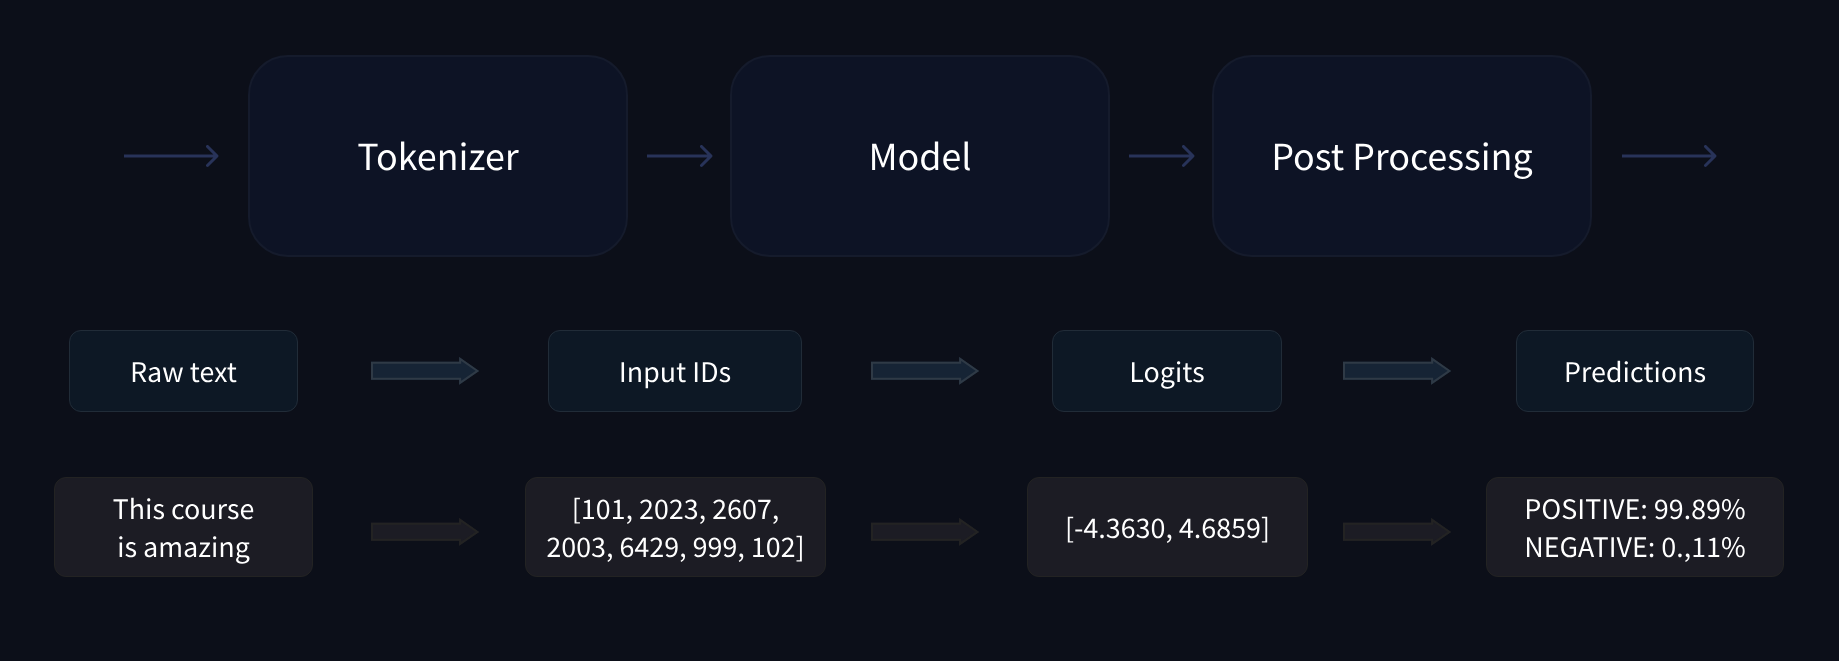

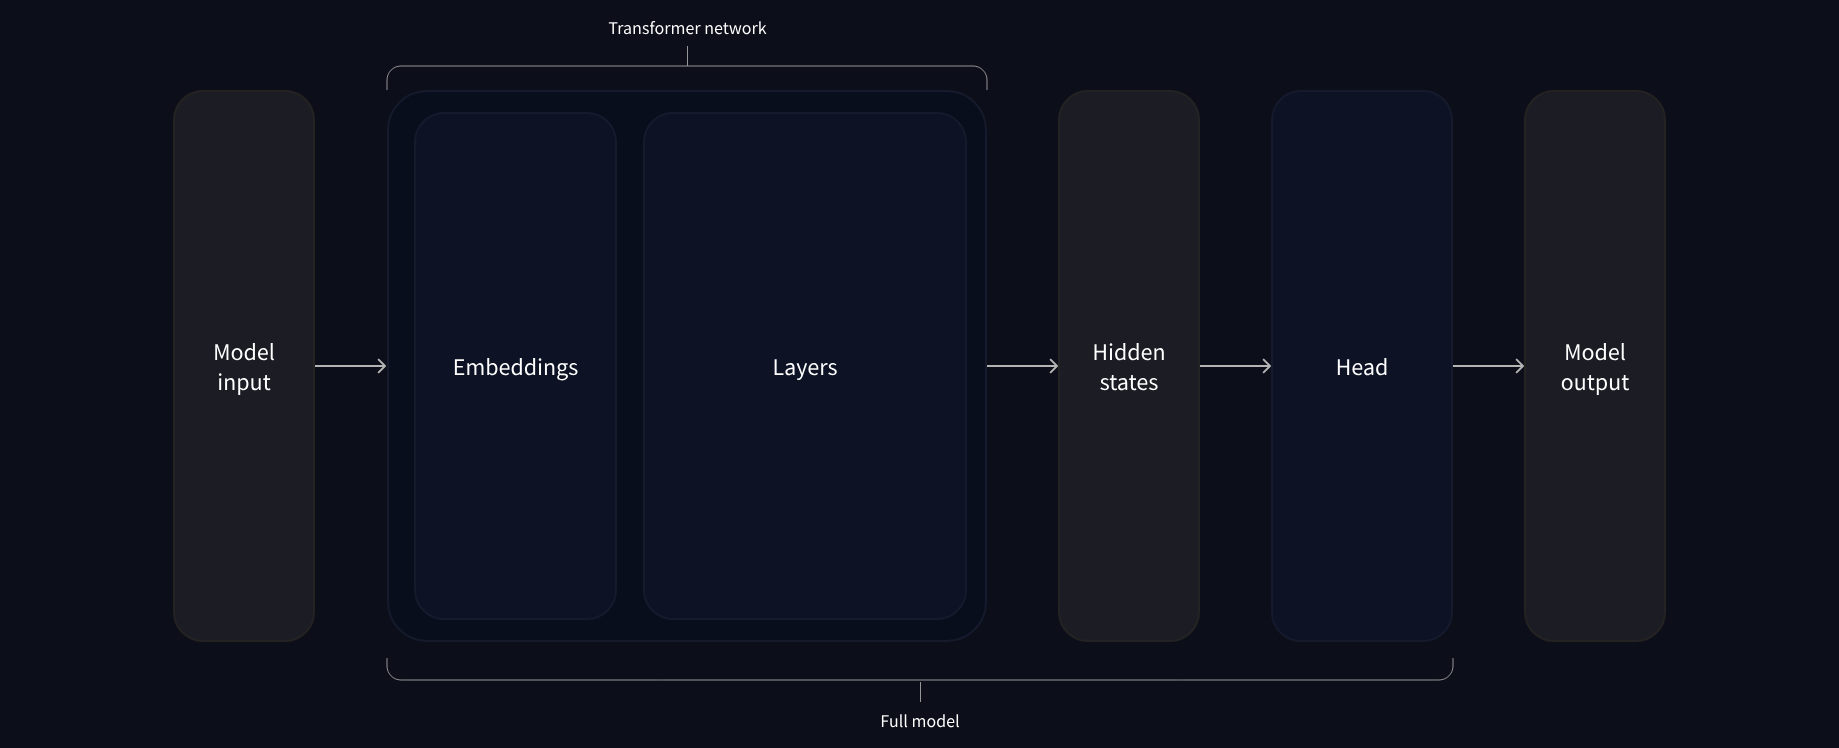

In [ ]:
# reminder: cache folder set with HF_HOME

In [1]:
# example: training a sequence classifier on one batch
import torch
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification

# Same as before
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = [
    "I've been waiting for a HuggingFace course my whole life.",
    "This course is amazing!",
]
batch = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")

# This is new
batch["labels"] = torch.tensor([1, 1])

optimizer = AdamW(model.parameters())
loss = model(**batch).loss
loss.backward()
optimizer.step()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


### Using datasets
Result: DatasetDict object with train, test, validation sets.

MRPC: Pairs of sentences, label (paraphrase or not).

Each has several columns (sentence1, sentence2,  label, and idx) and a variable number of rows (no. elements in each set).

In [8]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [1]:
from datasets import load_dataset

raw_datasets = load_dataset("glue", "mrpc")
raw_datasets

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/3668 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/408 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1725 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})

In [2]:
raw_train_dataset = raw_datasets["train"]
raw_train_dataset[0] # each pair of sentences indexed like dict

{'sentence1': 'Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .',
 'sentence2': 'Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .',
 'label': 1,
 'idx': 0}

In [3]:
raw_train_dataset.features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['not_equivalent', 'equivalent'], id=None),
 'idx': Value(dtype='int32', id=None)}

In [4]:
raw_train_dataset[15], raw_train_dataset[87]

({'sentence1': 'Rudder was most recently senior vice president for the Developer & Platform Evangelism Business .',
  'sentence2': 'Senior Vice President Eric Rudder , formerly head of the Developer and Platform Evangelism unit , will lead the new entity .',
  'label': 0,
  'idx': 16},
 {'sentence1': 'Tuition at four-year private colleges averaged $ 19,710 this year , up 6 percent from 2002 .',
  'sentence2': 'For the current academic year , tuition at public colleges averaged $ 4,694 , up almost $ 600 from the year before .',
  'label': 1,
  'idx': 100})

### Preprocessing a dataset - MRPC





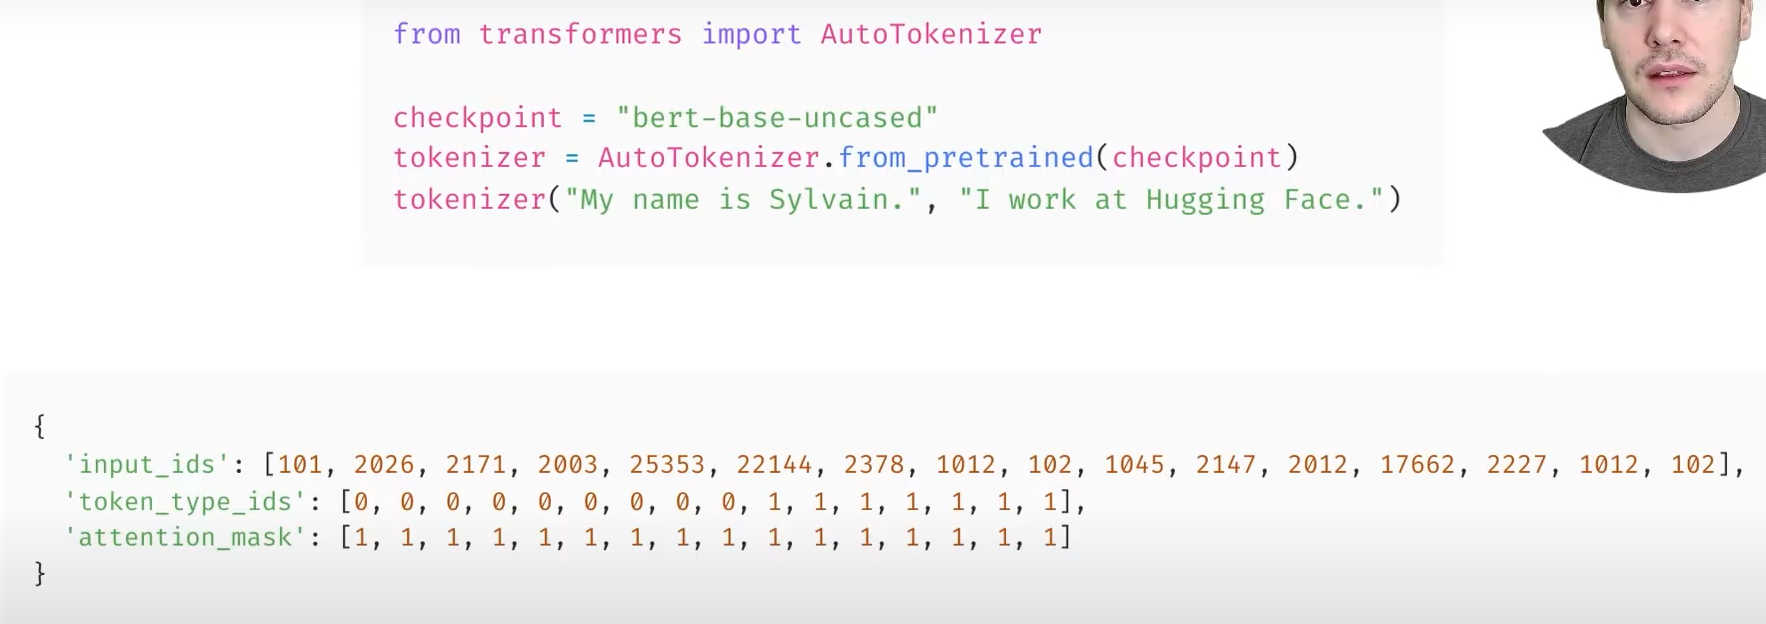

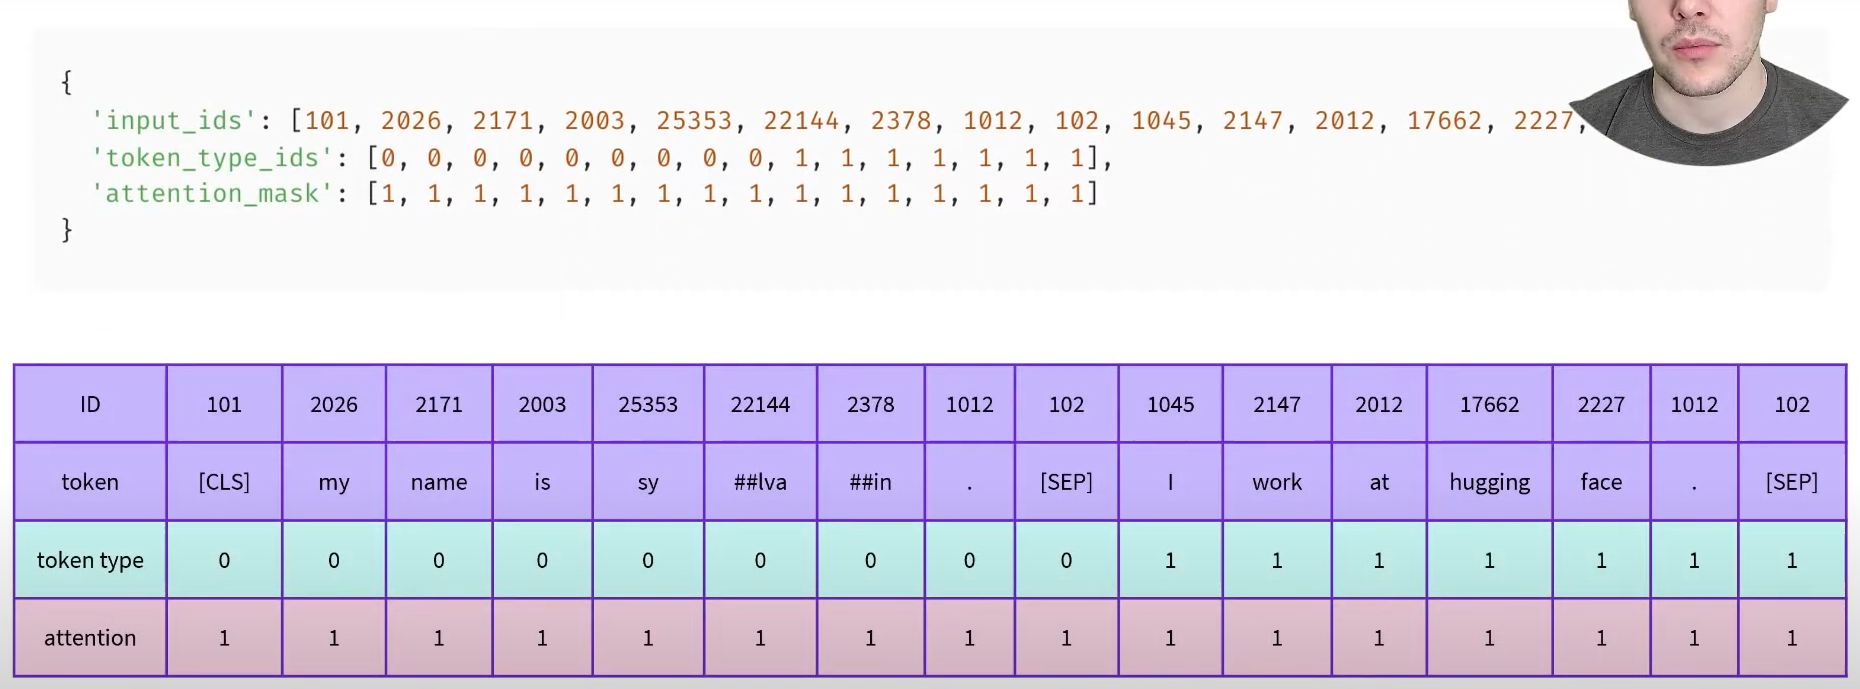

In [11]:
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenized_sentences_1 = tokenizer(raw_datasets["train"]["sentence1"])
tokenized_sentences_2 = tokenizer(raw_datasets["train"]["sentence2"])

In [12]:
# handling 2 seqs as a pair + tokenization
inputs = tokenizer("This is the first sentence.", "This is the second one.")
inputs

# token_type_ids = informs which part of the input is the first sentence and which is the second sentence

{'input_ids': [101, 2023, 2003, 1996, 2034, 6251, 1012, 102, 2023, 2003, 1996, 2117, 2028, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [10]:
# separatedly
input1 = tokenizer(raw_train_dataset[15]['sentence1'])
input2 = tokenizer(raw_train_dataset[15]['sentence2'])
print(input1, input2)

# batch -> difference in token_type_ids
inputs_combined = tokenizer(raw_train_dataset[15]['sentence1'], raw_train_dataset[15]['sentence2'])
inputs_combined

{'input_ids': [101, 24049, 2001, 2087, 3728, 3026, 3580, 2343, 2005, 1996, 9722, 1004, 4132, 9340, 12439, 2964, 2449, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]} {'input_ids': [101, 3026, 3580, 2343, 4388, 24049, 1010, 3839, 2132, 1997, 1996, 9722, 1998, 4132, 9340, 12439, 2964, 3131, 1010, 2097, 2599, 1996, 2047, 9178, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


{'input_ids': [101, 24049, 2001, 2087, 3728, 3026, 3580, 2343, 2005, 1996, 9722, 1004, 4132, 9340, 12439, 2964, 2449, 1012, 102, 3026, 3580, 2343, 4388, 24049, 1010, 3839, 2132, 1997, 1996, 9722, 1998, 4132, 9340, 12439, 2964, 3131, 1010, 2097, 2599, 1996, 2047, 9178, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [13]:
tokenizer.convert_ids_to_tokens(inputs["input_ids"]) # tokenizer adds special tokens

['[CLS]',
 'this',
 'is',
 'the',
 'first',
 'sentence',
 '.',
 '[SEP]',
 'this',
 'is',
 'the',
 'second',
 'one',
 '.',
 '[SEP]']

In batch, alignment with token_type_ids: (not all models return them, depends on task)

```
['[CLS]', 'this', 'is', 'the', 'first', 'sentence', '.', '[SEP]', 'this', 'is', 'the', 'second', 'one', '.', '[SEP]']
[      0,      0,    0,     0,       0,          0,   0,       0,      1,    1,     1,        1,     1,   1,       1]
```



In [14]:
# tokenizing the dataset (dict)
tokenized_dataset = tokenizer(
    raw_datasets["train"]["sentence1"],
    raw_datasets["train"]["sentence2"],
    padding=True,
    truncation=True,
)

In [15]:
def tokenize_function(example): #
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

Note: padding all the samples to the maximum length is not efficient: it’s better to pad the samples when we’re building a batch, as then we only need to pad to the maximum length in that batch, and not the maximum length in the entire dataset

In [16]:
# adding new fields to the datasets, one for each key in the dictionary returned by the preprocessing:
# input_ids, attention_mask, token_type_ids
tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/3668 [00:00<?, ? examples/s]

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

Map:   0%|          | 0/1725 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1725
    })
})

### Dynamic padding
- Collate function: putting together samples inside a batch
- DataCollatorWithPadding: define a collate function that will apply the correct amount of padding to the items of the dataset we want to batch together

In [17]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [18]:
samples = tokenized_datasets["train"][:8]
samples = {k: v for k, v in samples.items() if k not in ["idx", "sentence1", "sentence2"]}
[len(x) for x in samples["input_ids"]] # samples of varying length

[50, 59, 47, 67, 59, 50, 62, 32]

In [19]:
# dynamic padding = samples in this batch should all be padded to 67 (max in batch)
batch = data_collator(samples)
{k: v.shape for k, v in batch.items()}

{'input_ids': torch.Size([8, 67]),
 'token_type_ids': torch.Size([8, 67]),
 'attention_mask': torch.Size([8, 67]),
 'labels': torch.Size([8])}

### Preprocessing a dataset - GLUE
Single sentences.

In [23]:
sst2_dataset = load_dataset("glue", "sst2")
sst2_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})

In [25]:
sst2_train_dataset = sst2_dataset["train"]
sst2_train_dataset[0], sst2_train_dataset[2]

({'sentence': 'hide new secretions from the parental units ',
  'label': 0,
  'idx': 0},
 {'sentence': 'that loves its characters and communicates something rather beautiful about human nature ',
  'label': 1,
  'idx': 2})

In [27]:
sst2_train_dataset.features

{'sentence': Value(dtype='string', id=None),
 'label': ClassLabel(names=['negative', 'positive'], id=None),
 'idx': Value(dtype='int32', id=None)}

In [28]:
input_sst2 = tokenizer(sst2_train_dataset[0]['sentence'])
input_sst2

{'input_ids': [101, 5342, 2047, 3595, 8496, 2013, 1996, 18643, 3197, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [29]:
tokenizer.convert_ids_to_tokens(input_sst2["input_ids"])

['[CLS]',
 'hide',
 'new',
 'secret',
 '##ions',
 'from',
 'the',
 'parental',
 'units',
 '[SEP]']

In [30]:
tokenized_sst2_dataset = tokenizer(
    sst2_dataset["train"]["sentence"],
    padding=True,
    truncation=True,
)

In [31]:
def tokenize_function(example):
    return tokenizer(example["sentence"], truncation=True)

tokenized_sst2_dataset = sst2_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

In [32]:
tokenized_sst2_dataset # with input_ids, attention_mask, token_type_ids

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1821
    })
})

In [33]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [34]:
samples = tokenized_sst2_dataset["train"][:8]
samples = {k: v for k, v in samples.items() if k not in ["idx", "sentence"]}
[len(x) for x in samples["input_ids"]] # max length = 29 = max padding for this batch

[10, 11, 15, 10, 22, 13, 29, 6]

In [36]:
batch = data_collator(samples)
{k: v.shape for k, v in batch.items()} # as expected

{'input_ids': torch.Size([8, 29]),
 'token_type_ids': torch.Size([8, 29]),
 'attention_mask': torch.Size([8, 29]),
 'labels': torch.Size([8])}